# K2 C18 M67 lightcurve search

For the AAS poster

In [1]:
import lightkurve as lk

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits

In [4]:
c = SkyCoord(ra='08 51 13.354', dec='+11 51 40.15', unit=(u.hourangle, u.deg), frame='icrs')

In [5]:
result = lk.search_targetpixelfile(200233338, campaign=18)
result

SearchResult containing 1 data products.

  obsID     target_name           productFilename                        description              distance
---------- ------------- ---------------------------------- ------------------------------------- --------
9500600193 ktwo200233338 ktwo200233338-c18_lpd-targ.fits.gz Target Pixel Long Cadence (KTL) - C18      0.0

In [6]:
tpf = result.download()

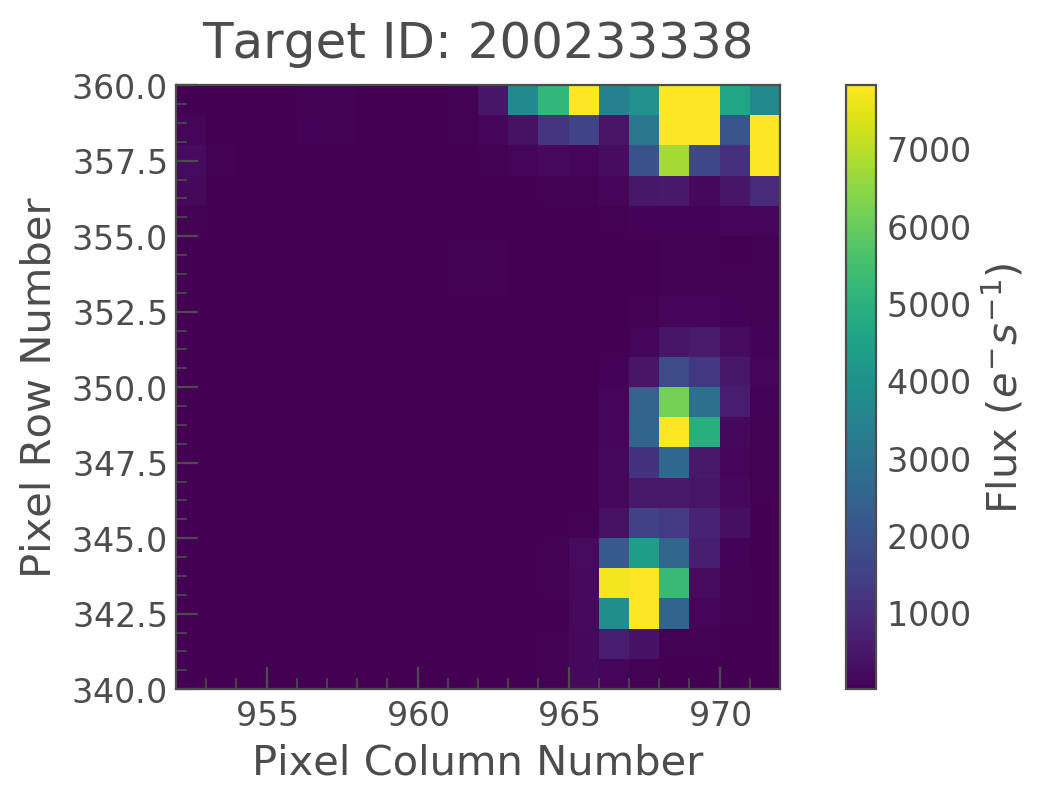

In [7]:
tpf.plot();

Oh no, which source is it??

In [8]:
delta_y, delta_x = tpf.wcs.all_world2pix(c.ra.value, c.dec.value, 1)
tpf.row + delta_x, tpf.column + delta_y

(343.8305006968113, 968.3140784132212)

It's in the low right corner.  Let's interact with the data...

In [23]:
tpf.interact(exported_filename='K2C18_my_spotted_star.fits')

Woohoo!  we saved a lightcurve:

In [10]:
! ls K2C18*

K2C18_my_spotted_star.fits


Let's open up the saved file and apply SFF

In [12]:
custom_mask = fits.open('K2C18_my_spotted_star.fits')['APERTURE'].data

In [15]:
#tpf.plot(aperture_mask=custom_mask)

In [16]:
lc_targ = tpf.extract_aperture_photometry(aperture_mask=custom_mask)

Yay!

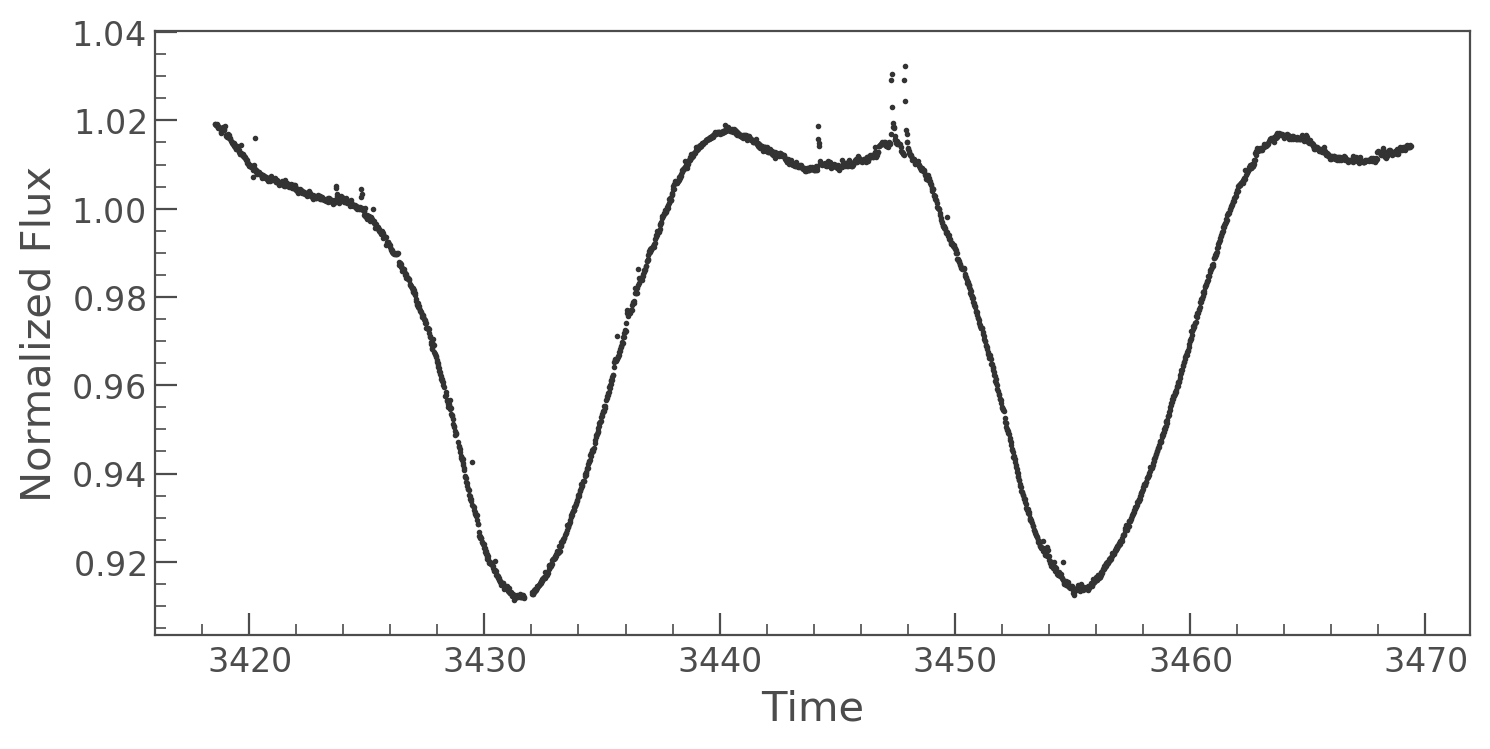

In [25]:
from lightkurve.correctors import SFFCorrector
sff = SFFCorrector()
lc_corrected = sff.correct(lc_targ.time, lc_targ.flux, lc_targ.centroid_col, 
                           lc_targ.centroid_row, niters=5, windows=20, polyorder=5,
                           restore_trend=True)
lc_corrected.scatter()

Nice!

In [18]:
lc_corrected.to_csv('K2C18_my_spotted_star_SFF.csv')

We're done!

Let's find its period.

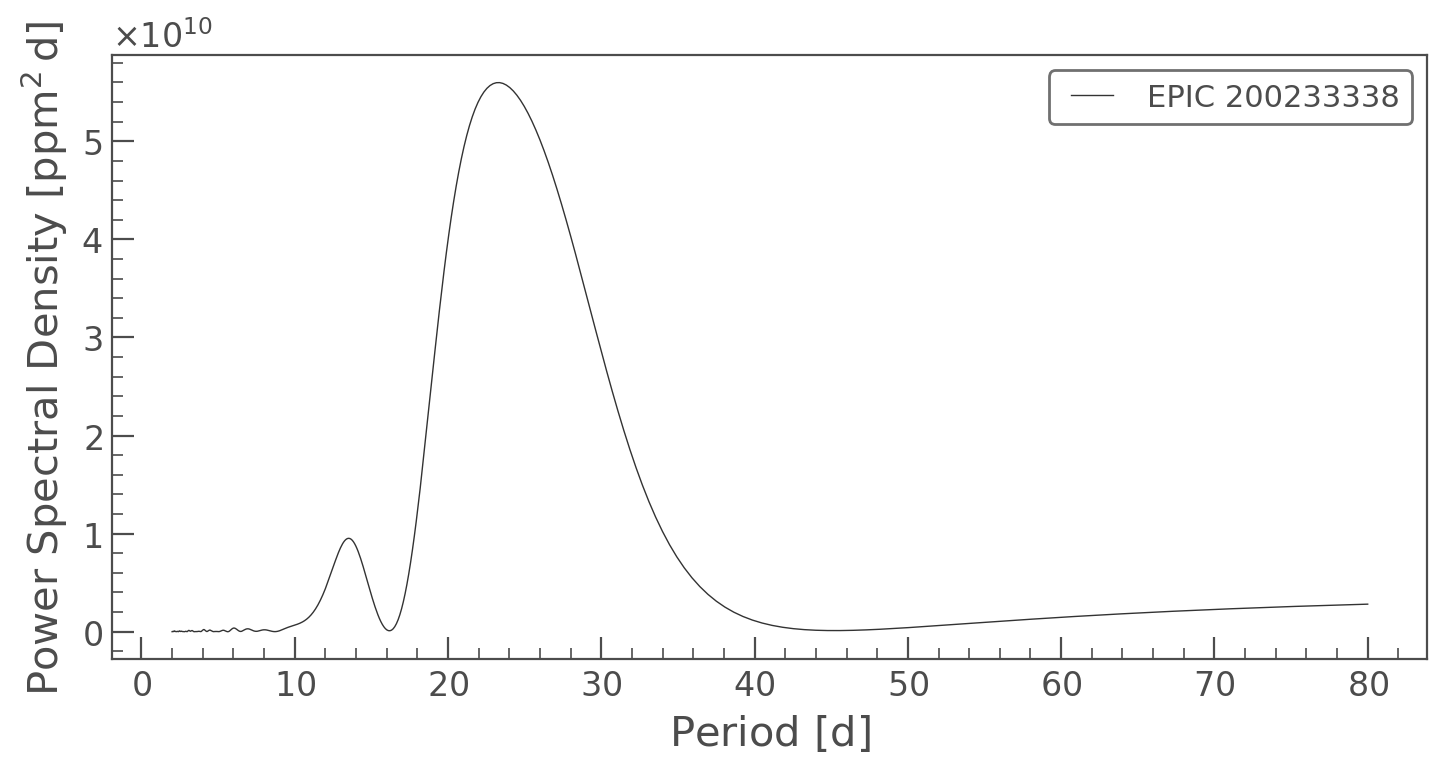

In [21]:
pg = lc_targ.to_periodogram(oversample_factor=50, min_period=2, max_period=80)
pg.plot(format='period')

In [22]:
pg.period_at_max_power

<Quantity 23.36757452 d>